In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-articles/Articles.csv


# <h2><b>Dengan NLTK

In [8]:
df = pd.read_csv(str(os.path.join(dirname, filename)), encoding="ISO-8859-1")

In [10]:
df.head(2)

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business


In [11]:
df.isna().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [12]:
df[df['Article'] == ""]

,Article,Date,Heading,NewsType


In [13]:
import re
import nltk
from nltk.corpus import  stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('@')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# remove english stopwords function
def remove_stopwords(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['id','amp','deh','tanyakanrl','tanyarlfes','sih','ii','ia','ie','na','si','rj','lc','oi','oo','io','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

def stemming(text) : 
    # Create an instance of PorterStemmer
    porter_stemmer = PorterStemmer()
    word_tokens = text.split()
    # Perform stemming
    stemmed_words = [porter_stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


# Preprocessing kolom 'text'
df['Article'] = df['Article'].apply(remove_punctuation)
df['Article'] = df['Article'].apply(remove_tag)
df['Article'] = df['Article'].apply(ubah_angka)
df['Article'] = df['Article'].apply(remove_number)
df['Article'] = df['Article'].apply(remove_links)
df['Article'] = df['Article'].apply(remove_stopwords)
df['Article'] = df['Article'].apply(remove_single_letter_words)
df['Article'] = df['Article'].apply(stemming)

# Menampilkan DataFrame setelah preprocessing
df.head(2)

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,Article,Date,Heading,NewsType
0,karachi sindh govern decid bring public transp...,1/1/2015,sindh govt decides to cut public transport far...,business
1,hong kong asian market start upsw limit trade ...,1/2/2015,asia stocks up in new year trad,business


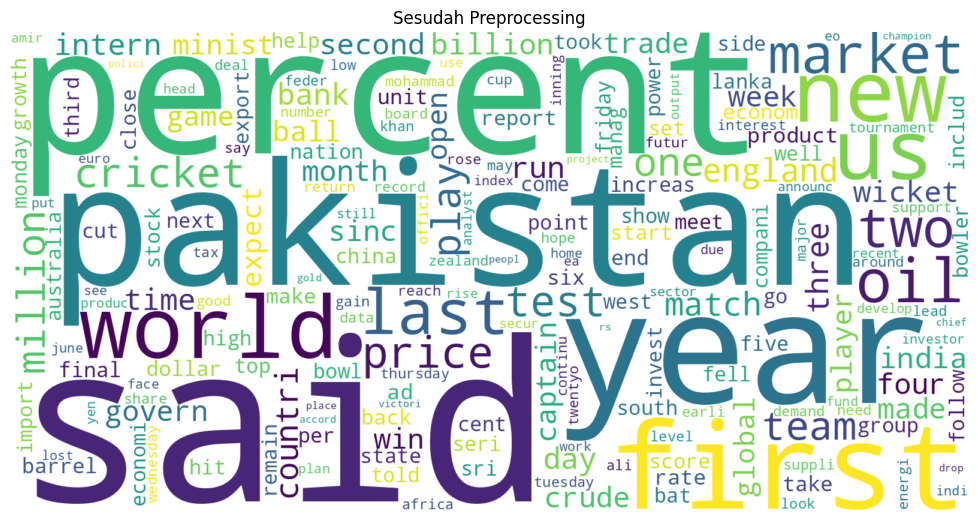

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca file CSV sebelum preprocessing
file_path_before = str(os.path.join(dirname, filename))
df_before = pd.read_csv(file_path_before, encoding="ISO-8859-1")

# Ubah kolom 'Article' ke string dan tangani nilai NaN
df_before['Article'] = df_before['Article'].astype(str)
df['Article'] = df['Article'].astype(str)

# Gabungkan semua teks tweet menjadi satu string
combined_text_before = ' '.join(df_before['Article'])
combined_text_after = ' '.join(df['Article'])

# Buat objek WordCloud untuk sebelum dan sesudah preprocessing
wordcloud_before = WordCloud(width=1600, height=800, background_color='white').generate(combined_text_before)
wordcloud_after = WordCloud(width=1600, height=800, collocations=False, background_color='white').generate(combined_text_after)

# Tampilkan gambar Word Cloud secara bersampingan
plt.figure(figsize=(20, 10))

# plt.subplot(1, 2, 1)
# plt.imshow(wordcloud_before, interpolation='bilinear')
# plt.axis("off")
# plt.title('Sebelum Preprocessing')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title('Sesudah Preprocessing')

plt.tight_layout(pad=2)
plt.show()

In [18]:
!pip install pyLDAvis

In [20]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
# import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


# Tokenize the text in the 'full_text' column
texts = [text.split() for text in df['Article']]

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(texts)

# Convert the text to a Bag of Words (BoW) representation
corpus = [dictionary.doc2bow(text) for text in texts]

# Initialize variables to keep track of the best model and coherence score
best_coherence_score = -1
best_lda_model = None
best_num_topics = 0

# Define the range of topics to explore
num_topics_range = range(2, 20)

# Iterate through different numbers of topics
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    
    # Calculate coherence score for the current model
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Check if the current model has a higher coherence score
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
        best_num_topics = num_topics

# Print the best number of topics and its corresponding coherence score
print(f"Best Number of Topics: {best_num_topics}")
print(f"Best Coherence Score: {best_coherence_score}")
best_num_topics_str = str(best_num_topics)

# Print and explore the topics of the best model
topics = best_lda_model.show_topics(num_topics=best_num_topics, num_words=20, formatted=False)
print(topics)
for topic in topics:
    print(f"Topic {topic[0] + 1}:")
    print([word[0] for word in topic[1]])
    print()

# Visualize topics using pyLDAvis (optional)
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, dictionary)
# pyLDAvis.save_html(vis, 'lda.html')


Best Number of Topics: 5
Best Coherence Score: 0.6501137819860202
[(0, [('pakistan', 0.051949244), ('amir', 0.028272765), ('mohammad', 0.020639906), ('cricket', 0.017983556), ('khan', 0.017875386), ('shah', 0.01569907), ('ali', 0.012910489), ('team', 0.011774078), ('captain', 0.009024307), ('ahm', 0.008800989), ('yasir', 0.0077410126), ('pcb', 0.0075705065), ('hafeez', 0.0067006703), ('misbah', 0.006651584), ('youni', 0.006591794), ('misbahulhaq', 0.0060048793), ('azhar', 0.0057394737), ('wahab', 0.005583815), ('sohail', 0.0055662813), ('riaz', 0.0054814955)]), (1, [('test', 0.013859639), ('first', 0.013643774), ('england', 0.011221033), ('play', 0.008429183), ('match', 0.007861512), ('two', 0.007734562), ('second', 0.007172459), ('run', 0.0066902926), ('team', 0.006388595), ('wicket', 0.0061795376), ('three', 0.0061602234), ('four', 0.006138944), ('open', 0.0059653344), ('ball', 0.005931071), ('win', 0.0058653806), ('one', 0.0057202918), ('cricket', 0.0054077273), ('seri', 0.005092946

Jika menggunakan TF-IDF

In [21]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel

# Tokenize the text in the 'Article' column
texts = [text.split() for text in df['Article']]

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(texts)

# Convert the text to a TF-IDF representation
tfidf_model = TfidfModel(dictionary=dictionary, normalize=True)
corpus_tfidf = tfidf_model[corpus]

# Initialize variables to keep track of the best model and coherence score
best_coherence_score = -1
best_lda_model = None
best_num_topics = 0

# Define the range of topics to explore
num_topics_range = range(2, 20)

# Iterate through different numbers of topics
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    
    # Calculate coherence score for the current model
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Check if the current model has a higher coherence score
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
        best_num_topics = num_topics

# Print the best number of topics and its corresponding coherence score
print(f"Best Number of Topics: {best_num_topics}")
print(f"Best Coherence Score: {best_coherence_score}")
best_num_topics_str = str(best_num_topics)

# Print and explore the topics of the best model
topics = best_lda_model.show_topics(num_topics=best_num_topics, num_words=20, formatted=False)
print(topics)
for topic in topics:
    print(f"Topic {topic[0] + 1}:")
    print([word[0] for word in topic[1]])
    print()


Best Number of Topics: 3
Best Coherence Score: 0.5116698700401606
[(0, [('ivanka', 2.5826703e-05), ('kushner', 2.5826019e-05), ('crrc', 2.582416e-05), ('bampr', 2.582327e-05), ('silk', 2.5822374e-05), ('arcelik', 2.5821479e-05), ('bulgurlu', 2.5821479e-05), ('twf', 2.5821448e-05), ('subbiya', 2.5821202e-05), ('foodpanda', 2.5819903e-05), ('causeway', 2.5819665e-05), ('locomot', 2.5818828e-05), ('subsaharan', 2.581858e-05), ('keti', 2.5818546e-05), ('bombardi', 2.5818152e-05), ('multilevel', 2.5818152e-05), ('hyundai', 2.5817908e-05), ('afin', 2.5817859e-05), ('dasu', 2.5817859e-05), ('sandakan', 2.5817557e-05)]), (1, [('test', 0.0018570708), ('england', 0.0015032149), ('pakistan', 0.0014782794), ('percent', 0.0010605478), ('cricket', 0.0010591099), ('oil', 0.0010247141), ('first', 0.0009402162), ('said', 0.00092073093), ('wicket', 0.00089281145), ('play', 0.0008838415), ('team', 0.0008835013), ('trump', 0.0008804404), ('us', 0.00082039135), ('lanka', 0.0008116262), ('countri', 0.000808

<h2><b>Menggunakan passes 50

In [22]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
# import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


# Tokenize the text in the 'full_text' column
texts = [text.split() for text in df['Article']]

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(texts)

# Convert the text to a Bag of Words (BoW) representation
corpus = [dictionary.doc2bow(text) for text in texts]

# Initialize variables to keep track of the best model and coherence score
best_coherence_score = -1
best_lda_model = None
best_num_topics = 0

# Define the range of topics to explore
num_topics_range = range(2, 20)

# Iterate through different numbers of topics
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=50, alpha='auto', per_word_topics=True)
    
    # Calculate coherence score for the current model
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Check if the current model has a higher coherence score
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
        best_num_topics = num_topics

# Print the best number of topics and its corresponding coherence score
print(f"Best Number of Topics: {best_num_topics}")
print(f"Best Coherence Score: {best_coherence_score}")
best_num_topics_str = str(best_num_topics)

# Print and explore the topics of the best model
topics = best_lda_model.show_topics(num_topics=best_num_topics, num_words=20, formatted=False)
print(topics)
for topic in topics:
    print(f"Topic {topic[0] + 1}:")
    print([word[0] for word in topic[1]])
    print()

# Visualize topics using pyLDAvis (optional)
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, dictionary)
# pyLDAvis.save_html(vis, 'lda.html')


Best Number of Topics: 5
Best Coherence Score: 0.6426536590569046
[(0, [('pakistan', 0.048824873), ('amir', 0.024603372), ('cricket', 0.021518013), ('mohammad', 0.020098845), ('khan', 0.01756723), ('team', 0.01334325), ('shah', 0.012854919), ('ali', 0.011345377), ('captain', 0.0095699895), ('pcb', 0.009144022), ('ahm', 0.008864319), ('yasir', 0.0062499545), ('afridi', 0.0059511606), ('hafeez', 0.0058109676), ('youni', 0.005711334), ('misbah', 0.0053948793), ('wahab', 0.0051988717), ('riaz', 0.0051080147), ('misbahulhaq', 0.00503358), ('azhar', 0.0049852007)]), (1, [('first', 0.01284606), ('test', 0.012776464), ('england', 0.010673151), ('play', 0.008467653), ('match', 0.008287421), ('two', 0.007780959), ('second', 0.006788207), ('run', 0.006738668), ('team', 0.0066812932), ('wicket', 0.006436746), ('cricket', 0.0062746713), ('ball', 0.006190281), ('four', 0.0061051208), ('three', 0.006023133), ('open', 0.005833233), ('win', 0.005535294), ('one', 0.005510567), ('seri', 0.004920764), ('w

# <h2><b>Dengan Spacy

In [24]:
df = pd.read_csv(str(os.path.join(dirname, filename)), encoding="ISO-8859-1")

In [26]:
import re
import spacy

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('@')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['id','amp','deh','tanyakanrl','tanyarlfes','sih','ii','ia','ie','na','si','rj','lc','oi','oo','io','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

def stopword_lemma_spacy(text) :
    # Memuat model bahasa Inggris dari Spacy
    nlp = spacy.load('en_core_web_sm')
    # Proses tokenisasi, lemmatization, dan menghilangkan stop words
    doc = nlp(text)

    # Ambil kata-kata setelah preprocessing
    processed_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return processed_words


# Preprocessing kolom 'text'
df['Article'] = df['Article'].apply(remove_punctuation)
df['Article'] = df['Article'].apply(remove_tag)
df['Article'] = df['Article'].apply(ubah_angka)
df['Article'] = df['Article'].apply(remove_number)
df['Article'] = df['Article'].apply(remove_links)
df['Article'] = df['Article'].apply(remove_single_letter_words)
df['Article'] = df['Article'].apply(stopword_lemma_spacy)

# Menampilkan DataFrame setelah preprocessing
df.head(2)

,Article,Date,Heading,NewsType
0,"[karachi, sindh, government, decide, bring, pu...",1/1/2015,sindh govt decides to cut public transport far...,business
1,"[hong, kong, asian, market, start, upswing, li...",1/2/2015,asia stocks up in new year trad,business


In [27]:
def satuin(text) : 
    return " ".join(text)

df_tes = pd.DataFrame()
df_tes['Articles'] = df['Article'].apply(satuin)

In [28]:
df_tes

,Articles
0,karachi sindh government decide bring public t...
1,hong kong asian market start upswing limited t...
2,hong kong hong kong share open percent low mon...
3,hong kong asian market tumble tuesday follow p...
4,new york oil price monday slip barrel time yea...
...,...
2687,strongdubai dubai international airport flag c...
2688,strongbeije prime minister shaukat aziz say su...
2689,strongwashington uber ground fleet selfdrive c...
2690,strongbeije new development bank plan cofinanc...


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Konversi teks ke representasi Bag-of-Words
vectorizer = CountVectorizer(max_features=1000, stop_words='english', max_df=0.85)
X = vectorizer.fit_transform(df_tes['Articles'])

# Inisialisasi dan melatih model LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Mendapatkan kata-kata kunci untuk setiap topik
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")


Topic #1: percent, market, dollar, stock, rate, index, rise, yen, gain, point
Topic #2: oil, price, say, percent, year, market, crude, million, barrel, bank
Topic #3: test, england, run, wicket, ball, second, match, win, score, series
Topic #4: say, pakistan, year, world, minister, government, billion, country, new, win
Topic #5: cricket, team, pakistan, say, play, world, match, india, captain, player


# <h2><b>Tanpa stemming

In [30]:
df = pd.read_csv(str(os.path.join(dirname, filename)), encoding="ISO-8859-1")

In [31]:
import re
import spacy

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('@')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['id','amp','deh','tanyakanrl','tanyarlfes','sih','ii','ia','ie','na','si','rj','lc','oi','oo','io','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

def stopword_lemma_spacy(text) :
    # Memuat model bahasa Inggris dari Spacy
    nlp = spacy.load('en_core_web_sm')
    # Proses tokenisasi, lemmatization, dan menghilangkan stop words
    doc = nlp(text)

    # Ambil kata-kata setelah preprocessing
    processed_words = [token.lemma_ for token in doc if not token.is_stop]

    return processed_words


# Preprocessing kolom 'text'
df['Article'] = df['Article'].apply(remove_punctuation)
df['Article'] = df['Article'].apply(remove_tag)
df['Article'] = df['Article'].apply(ubah_angka)
df['Article'] = df['Article'].apply(remove_number)
df['Article'] = df['Article'].apply(remove_links)
df['Article'] = df['Article'].apply(remove_single_letter_words)
df['Article'] = df['Article'].apply(stopword_lemma_spacy)

# Menampilkan DataFrame setelah preprocessing
df.head(2)

,Article,Date,Heading,NewsType
0,"[karachi, sindh, government, decide, bring, pu...",1/1/2015,sindh govt decides to cut public transport far...,business
1,"[hong, kong, asian, market, start, upswing, li...",1/2/2015,asia stocks up in new year trad,business


In [1]:
def satuin(text) : 
    return " ".join(text)

df_tes = pd.DataFrame()
df_tes['Articles'] = df['Article'].apply(satuin)

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Konversi teks ke representasi Bag-of-Words
vectorizer = CountVectorizer(max_features=1000, stop_words='english', max_df=0.85)
X = vectorizer.fit_transform(df_tes['Articles'])

# Inisialisasi dan melatih model LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Mendapatkan kata-kata kunci untuk setiap topik
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")
